# 作業:
    請嘗試改用CIFAR100

# Import Library

In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train,y_label_train), (x_img_test, y_label_test) = cifar100.load_data()
print('Shape of train data:', x_img_train.shape)
print('Shape of train label:', y_label_train.shape)
print('Shape of test data:', x_img_test.shape)
print('Shape of test label:', y_label_test.shape)
print(f'test[0]:\n{x_img_test[0]}')

Shape of train data: (50000, 32, 32, 3)
Shape of train label: (50000, 1)
Shape of test data: (10000, 32, 32, 3)
Shape of test label: (10000, 1)
test[0]:
[[[199 215 249]
  [196 211 244]
  [195 210 243]
  ...
  [216 231 250]
  [217 231 250]
  [224 234 252]]

 [[197 210 239]
  [195 208 238]
  [195 210 240]
  ...
  [231 243 250]
  [233 243 250]
  [241 245 253]]

 [[222 226 246]
  [213 220 242]
  [209 219 243]
  ...
  [243 250 251]
  [244 249 251]
  [250 250 253]]

 ...

 [[ 72  73  99]
  [ 71  74 102]
  [ 74  78 108]
  ...
  [220 208 217]
  [183 168 181]
  [155 141 150]]

 [[ 72  75 104]
  [ 76  81 111]
  [ 84  89 122]
  ...
  [222 212 220]
  [187 174 192]
  [145 132 149]]

 [[ 80  85 118]
  [ 84  90 123]
  [ 85  92 127]
  ...
  [217 207 215]
  [207 194 211]
  [176 164 183]]]


In [3]:
import matplotlib.pyplot as plt

def plot_images_labels_prediction(images, labels, idx, prediction = None, num = 10):
    fig = plt.figure(figsize = (12, 14))
    if num > 25: 
        num = 25 
    for i in range(idx, idx+num):
        ax = plt.subplot(5, 5, i - idx + 1)
        ax.imshow(images[i], cmap = 'binary')
        
        title = f"idx={i}, label = {labels[i][0]}"
        if prediction is not None:
            title += f" => {prediction[i]}"
            
        ax.set_title(title, fontsize=10) 
        ax.set_xticks([])
        ax.set_yticks([])        
    plt.show()

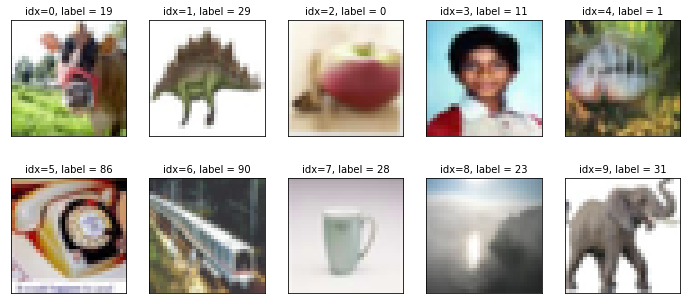

In [4]:
plot_images_labels_prediction(x_img_train,y_label_train,0)

# Image normalize 

In [5]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [6]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [7]:
y_label_train.shape

(50000, 1)

In [8]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [9]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [10]:
y_label_train_OneHot.shape

(50000, 100)

In [11]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.